In [1]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [20]:
kHz = 2 * jnp.pi
MHz = 1e3 * kHz
ms = 1
us = 1e-3
s = 1e3

In [41]:
N = 100
T1 = 2 * s
T2 = 2 * T1
nth = 50
alpha = jnp.sqrt(6)
kappa_ps = 2 / T1 * (1 + 2 * nth) * alpha**2 + 2 / T1 * nth
tps = 1 / kappa_ps
print(tps / ms, "ms")
print(tps / us, "us")
t_max = 5 * tps

1.5243901 ms
1524.39 us


In [27]:
kappa_1 = 1 / T1
kappa_phi = 1 / T2 - kappa_1 / 2

a = dq.destroy(N)
H = 0 * dq.eye(N)
L1 = jnp.sqrt(kappa_1 * (nth + 1)) * a
L1up = jnp.sqrt(kappa_1 * nth) * a.dag()
L_phi = jnp.sqrt(kappa_phi / 2) * a.dag() @ a

rho_0 = dq.unit(dq.coherent(N, alpha) + dq.coherent(N, -alpha))
times = jnp.linspace(0, t_max, 500)

output = dq.mesolve(H, [L1, L1up, L_phi], rho_0, times)

|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

|██████████| 100.0% ◆ elapsed 60.15ms ◆ remaining 0.00ms


/Users/remirousseau/.pyenv/versions/3.13.0/envs/dynamiqs/lib/python3.13/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/remirousseau/.pyenv/versions/3.13.0/envs/dynamiqs/lib/python3.13/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


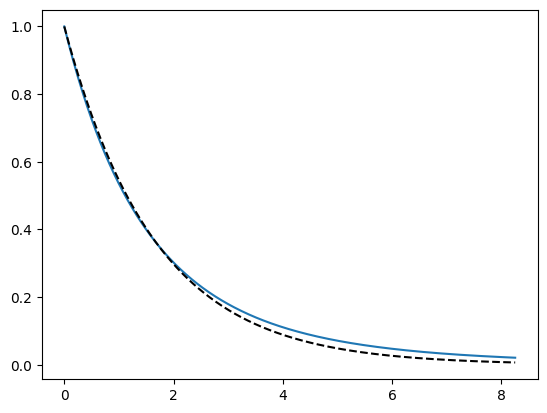

In [28]:
parity = dq.expect(dq.parity(N), output.states)
plt.plot(times, parity)
plt.plot(times, jnp.exp(-times / tps), "k--", label="theory")

100%|██████████| 50/50 [00:04<00:00, 11.08it/s]


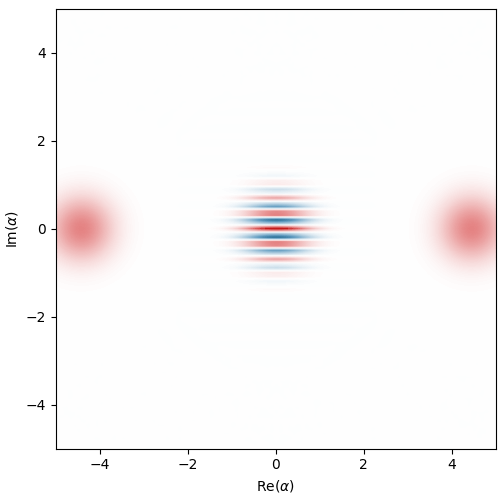

In [19]:
dq.plot.wigner_gif(output.states)

In [40]:
thermal = dq.unit(jnp.diag(1 / jnp.arange(1, N + 1)))
dq.expect(a @ a, thermal)

Array(0.+0.j, dtype=complex64)